In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import glutamate_roi_finder as grf
grf.Start_Background()
%matplotlib inline  

In [3]:
print(grf.API_IMG().imgDiffMaxSpatial[158:165])

[ 7  8 55  7  7  8  8]


In [20]:
print(grf.API_IMG().img.shape)
print(grf.API_IMG().imgDiff.shape)

(300, 512, 512)
(299, 512, 512)


[10.48 10.5  10.48 10.95 10.59 10.54 10.56]
[7.79 7.78 7.8  7.88 7.83 7.78 7.82]


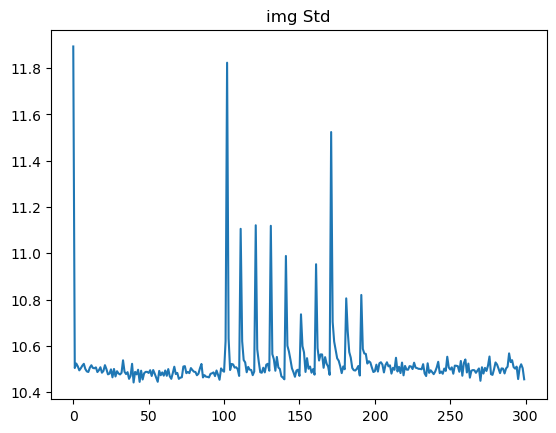

In [42]:
imgStd = np.std(grf.API_IMG().img, axis=(1,2))
imgMean = np.mean(grf.API_IMG().img, axis=(1,2))
print(imgStd[158:165].round(2))
print(imgMean[158:165].round(2))
plt.plot(imgStd)
plt.title("img Std")
plt.show()

[ 7  8 55  7  7  8  8]
[0.62 0.64 1.29 1.13 0.65 0.62 0.66]
[-0.    0.01  0.09 -0.05 -0.04  0.04  0.02]


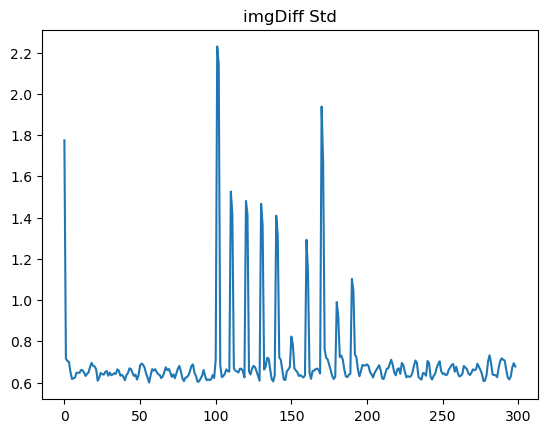

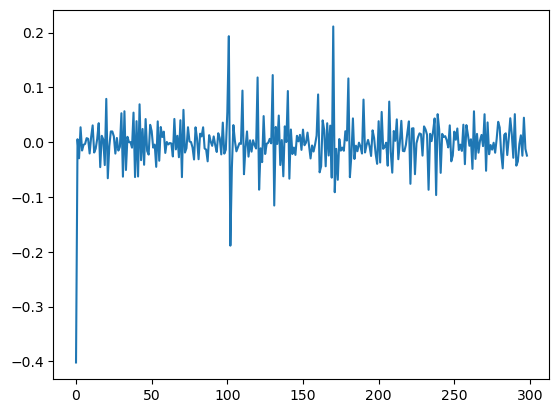

In [49]:
imgDiffStd = np.std(grf.API_IMG().imgDiff, axis=(1,2))
imgDiffMean = np.mean(grf.API_IMG().imgDiff, axis=(1,2))
print(grf.API_IMG().imgDiffMaxSpatial[158:165])
print(imgDiffStd[158:165].round(2))
print(imgDiffMean[158:165].round(2))
plt.plot(imgDiffStd)
plt.title("imgDiff Std")
plt.show()
plt.plot(imgDiffMean)
plt.show()

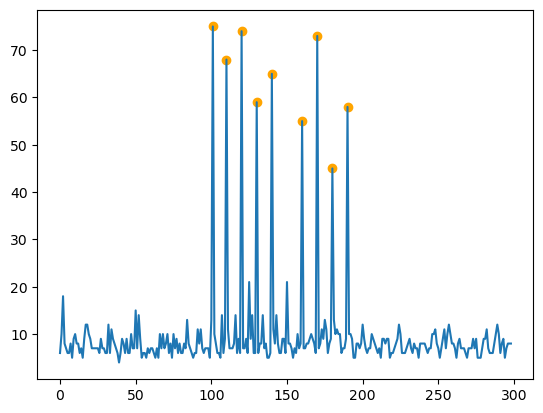

In [52]:
from scipy.signal import find_peaks
def CalcSignalPeaks():
    peaks, props = find_peaks(grf.API_IMG().imgDiffMaxSpatial, prominence=20)
    return peaks

_peaks = CalcSignalPeaks()
#plt.plot(range(100,200), grf.API_IMG().imgDiffMaxSpatial[100:200])
plt.plot(grf.API_IMG().imgDiffMaxSpatial)
plt.scatter(_peaks, grf.API_IMG().imgDiffMaxSpatial[_peaks], c="orange")
plt.show()

In [54]:
_diffMin = np.max(grf.API_IMG().imgDiff)
#_diffMin = np.max(grf.API_IMG().imgDiff[10:90])
def Plot(frame):
    global fig,ax,_diffMin
    fig, ax = plt.subplots()
    ax.imshow(grf.API_IMG().imgDiff[frame], vmin=0, vmax=_diffMin)
    #ax.imshow(grf.API_IMG().imgDiff[frame])
    plt.show()

interact(Plot, frame=widgets.IntSlider(min=0, max=grf.API_IMG().imgDiff.shape[0]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='frame', max=298), Output()), _dom_classes=('widget-inter…

<function __main__.Plot(frame)>

In [53]:
_diffMin = np.max(grf.API_IMG().imgDiff)
_peaks = CalcSignalPeaks()
def Plot(peak):
    global fig,ax,_diffMin,_peaks
    fig, ax = plt.subplots()
    ax.imshow(grf.API_IMG().imgDiff[_peaks[peak]], vmin=0, vmax=_diffMin)
    plt.show()

interact(Plot, peak=widgets.IntSlider(min=0, max=(len(_peaks)-1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='peak', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.Plot(peak)>

In [7]:
_diffMax = np.max(grf.API_IMG().imgDiff)
print(_diffMax)
_peaks = CalcSignalPeaks()
X = np.arange(0,grf.API_IMG().imgDiff.shape[2])
Y = np.arange(0,grf.API_IMG().imgDiff.shape[1])
X, Y = np.meshgrid(X, Y)
def Plot(peak):
    global fig,ax,_diffMax,_peaks, X,Y 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
    ax.axes.set_zlim3d(bottom=0, top=_diffMax) 
    ax.plot_surface(X,Y, grf.API_IMG().imgDiff[_peaks[peak]], cmap=cm.coolwarm, vmin=0, vmax=_diffMax/4)
    ax.set_title(_peaks[peak])
    plt.show()

interact(Plot, peak=widgets.IntSlider(min=0, max=(len(_peaks)-1), step=1, value=0))

75


interactive(children=(IntSlider(value=0, description='peak', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.Plot(peak)>

In [ ]:
#frame0MaxFilter = ndimage.maximum_filter(grf.API_IMG().imgDiff[_peaks[0]], size=(50))
plt.imshow(grf.API_IMG().imgDiff[_peaks[0]], vmin=0, vmax=_diffMin)
plt.plot(frame0LocalMax[:, 1], frame0LocalMax[:, 0], 'r.')
plt.show()

In [ ]:
import skimage.feature as skfeature
frame0LocalMax = skfeature.peak_local_max(grf.API_IMG().imgDiff[_peaks[0]], min_distance=10,threshold_abs=20)
print(len(frame0LocalMax))
print(frame0LocalMax)

In [ ]:
localImages = []
for i in range(len(frame0LocalMax)):
    localMax = frame0LocalMax[i]
    y, x = localMax
    localImages.append(grf.API_IMG().imgDiff[_peaks[0], (y-20):(y+20), (x-20):(x+20)])
    plt.imshow(localImages[i])
    plt.show()

In [ ]:
localMax = frame0LocalMax[0]
y, x = localMax
for i in range(-2,3):
    plt.imshow(grf.API_IMG().imgDiff[_peaks[0]-i, (y-20):(y+20), (x-20):(x+20)])
    plt.show()

1D seitlicher Plot


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for i in range(len(localImages)):
    locImg = localImages[i]
    locImg1D = np.max(locImg, axis=1)
    axes[i].plot(locImg1D)
    axes[i].set_title(i)
plt.tight_layout()
plt.show()

In [ ]:
axes[1].set_title("")

## Neuer Codes für utils/detection.py

In [3]:
from scipy.signal import find_peaks
import skimage.feature as skfeature

class ROIImage:

    def __init__(self):
        self.signalFrames = None
        self.peaks = None
        self.neurons = None

    def FindSignalFrames(self):
        self.signalFrames, _props = find_peaks(grf.API_IMG().imgDiffMaxSpatial, prominence=20)

    def FindPeaks(self, threshold, distance):
        if (self.signalFrames is None):
            return
        self.peaks = {}
        for frame in self.signalFrames:
            self.peaks[frame] = skfeature.peak_local_max(grf.API_IMG().imgDiff[frame], min_distance=distance,threshold_abs=threshold)
        
        self.neurons = {}
        for frame, peaks in self.peaks.items():
            self.neurons[frame] = self.peaks[frame].copy()
            for i in range(len(peaks)):
                peak = peaks[i]
                x = peak[1]
                y = peak[0]
                X = np.arange(x-20, x+20)
                Y = np.arange(x-20, x+20)
                X, Y = np.meshgrid(X, Y)
                localImg = grf.API_IMG().imgDiff[frame, (y-20):(y+20), (x-20):(x+20)].copy()
                localImg[localImg > 0] = 1
                center_of_mass = ndimage.center_of_mass(localImg)
                self.neurons[frame][i][0] = center_of_mass[0]+y-20
                self.neurons[frame][i][1] = center_of_mass[1]+x-20


roiImage = ROIImage()
roiImage.FindSignalFrames()
roiImage.FindPeaks(15, 30)

In [70]:
print(roiImage.neurons[101])
print(roiImage.peaks[101])

[[131 237]
 [122 430]
 [117 152]
 [153 441]]
[[133 235]
 [122 429]
 [119 154]
 [165 442]]


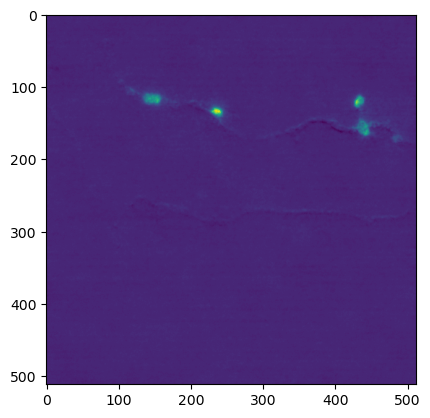

In [8]:
plt.imshow(grf.API_IMG().imgDiff[101])
plt.show()

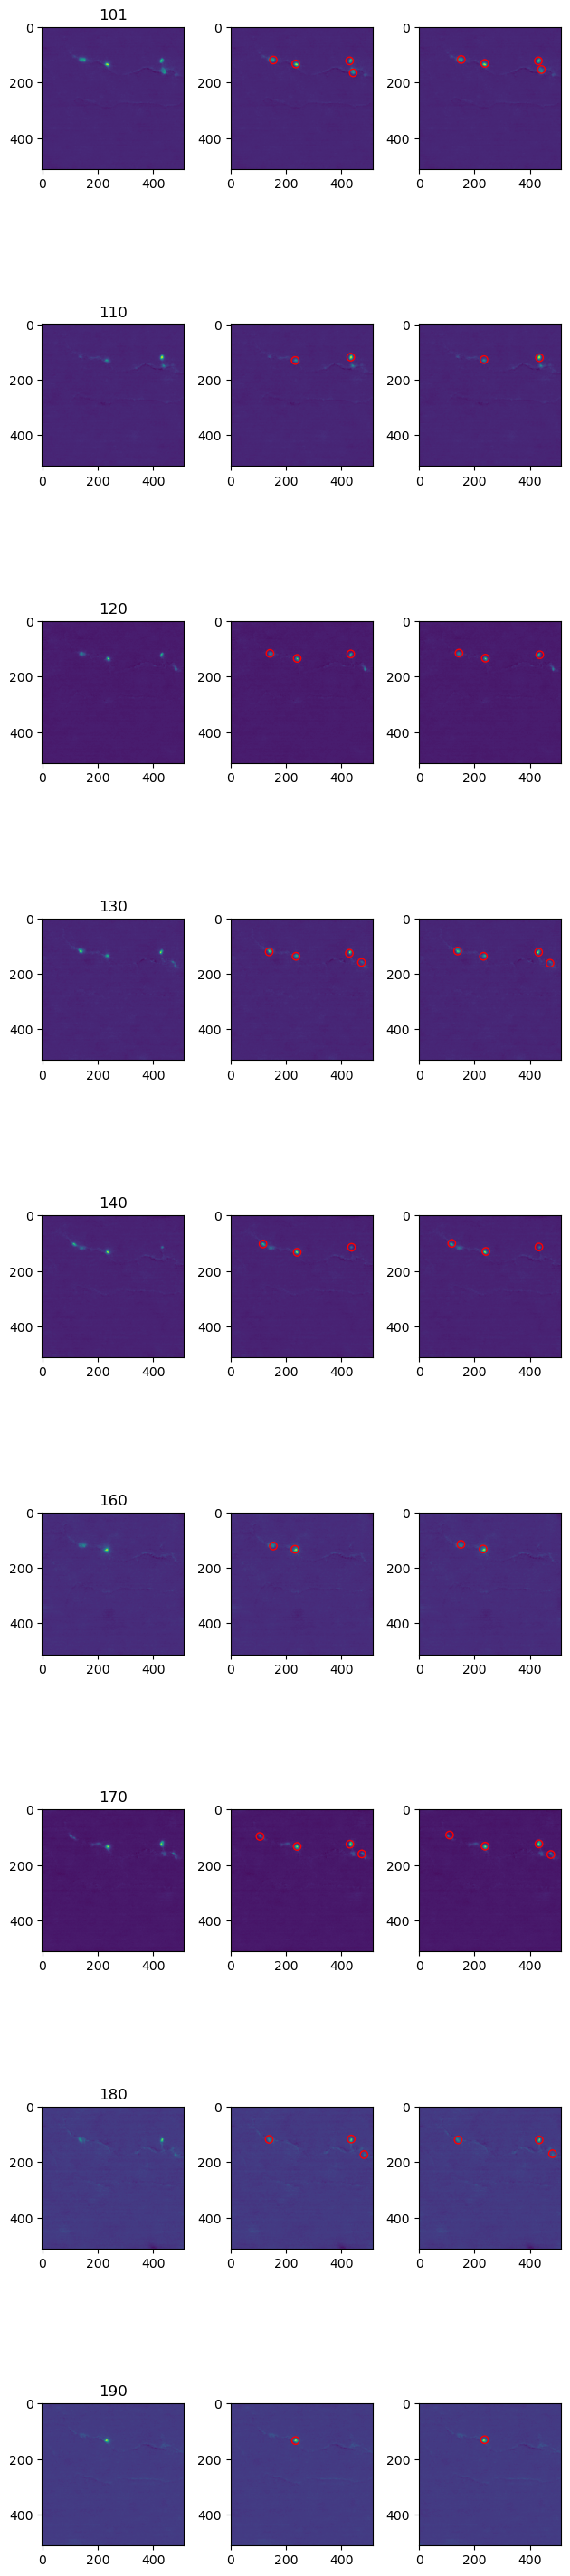

In [10]:
l = len(roiImage.peaks)
fig, axes = plt.subplots(nrows=l, ncols=3)
fig.set_figheight(30)
axes = axes.flatten()
i = 0
for frame,peaks in roiImage.peaks.items():
    neurons = roiImage.neurons[frame]
    axes[3*i].imshow(grf.API_IMG().imgDiff[frame])
    axes[3*i+1].imshow(grf.API_IMG().imgDiff[frame])
    axes[3*i+1].scatter(peaks[:,1], peaks[:,0], facecolors='none', edgecolors='r')
    axes[3*i+2].imshow(grf.API_IMG().imgDiff[frame])
    axes[3*i+2].scatter(neurons[:,1], neurons[:,0], facecolors='none', edgecolors='r')
    axes[3*i].set_title(frame)
    i += 1
plt.tight_layout()
plt.show()

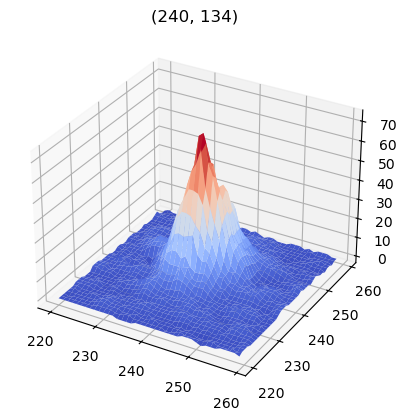

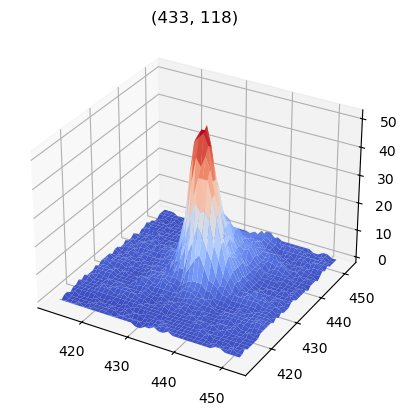

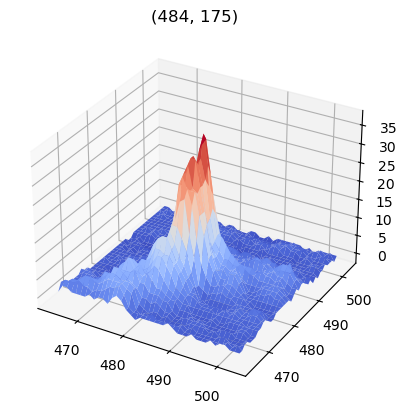

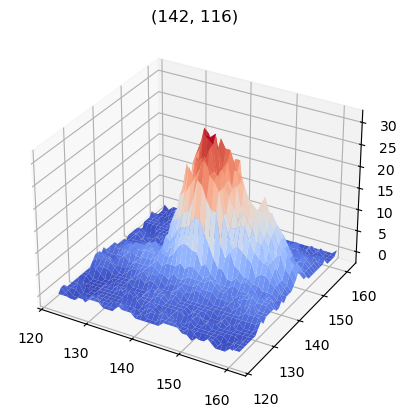

In [76]:
# Arbeite nun mit Peak 3 (frame 120)
_nr = 120
for peak in roiImage.peaks[_nr]:
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
    x = peak[1]
    y = peak[0]
    X = np.arange(x-20, x+20)
    Y = np.arange(x-20, x+20)
    X, Y = np.meshgrid(X, Y)
    localImg = grf.API_IMG().imgDiff[_nr, (y-20):(y+20), (x-20):(x+20)]
    #plt.imshow(localImg)
    ax.plot_surface(X,Y, localImg, cmap=cm.coolwarm)
    ax.set_title(f"({x}, {y})")
    plt.show()

[4.84785312e-09 5.14711288e-09 5.46375319e-09 ... 6.15666941e-09
 5.80103269e-09 5.46484605e-09]


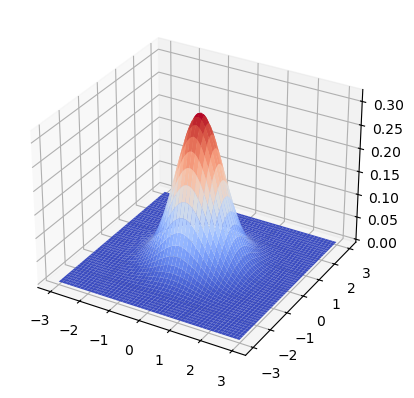

In [133]:
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
x, y = np.mgrid[-3:3:0.01, -3:3:0.01]
xy = np.column_stack([x.flat, y.flat])
Z = multivariate_normal.pdf(xy, mean=[0,0], cov=[0.5,0.5])
print(Z)
Z = Z.reshape(x.shape)
ax.plot_surface(x,y, Z, cmap=cm.coolwarm)
plt.show()

    area  moments_weighted-0-0  moments_weighted-0-1  moments_weighted-0-2  \
0  510.0                9440.0              158950.0             3028148.0   

   moments_weighted-0-3  moments_weighted-1-0  moments_weighted-1-1  \
0            63066352.0              113472.0             1932800.0   

   moments_weighted-1-2  moments_weighted-1-3  moments_weighted-2-0  \
0            36583498.0           743422928.0             1687506.0   

   moments_weighted-2-1  moments_weighted-2-2  moments_weighted-2-3  \
0            29241562.0           553287112.0          1.109821e+10   

   moments_weighted-3-0  moments_weighted-3-1  moments_weighted-3-2  \
0            27996330.0           494406782.0          9.400970e+09   

   moments_weighted-3-3  
0          1.879819e+11  


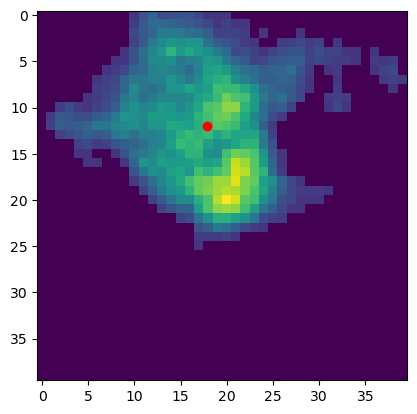

In [163]:
from skimage.measure import regionprops_table
import pandas as pd  

_localImg = localImg.copy()
_localImg[_localImg < 7] = 0
_localImgLabel = _localImg.copy()
_localImgLabel[_localImgLabel > 0] = 1
center_of_mass = ndimage.center_of_mass(_localImg)
regprops = regionprops_table(_localImgLabel, localImg, properties=["area","moments_weighted"])
data = pd.DataFrame(regprops) 
print(data)
plt.imshow(_localImg)
plt.scatter(center_of_mass[1], center_of_mass[0], c="red")
plt.show()

In [135]:
from scipy.optimize import curve_fit


def _Gaussian2d(X, amplitude, meanX, meanY, stdX, stdY):
    pass

def Gaussian2d(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

def FitGaussian2D(img):
    X = np.arange(0, img.shape[1])
    Y = np.arange(0, img.shape[1])
    curve_fit(Gaussian2d, (X, Y), img)

FitGaussian2D(localImg)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

### Nun alle Peaks zusammenmorphen und benachbarte Punkte zusammenfassen

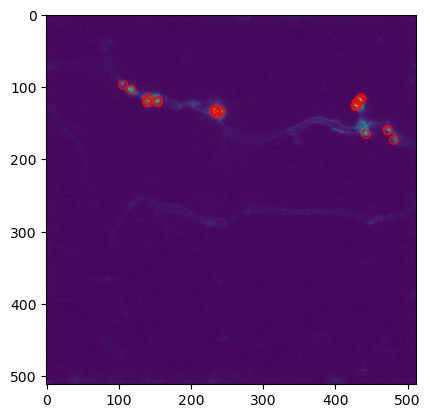

In [11]:
_peaks = []
for frame,peaks in roiImage.peaks.items():
    for peak in peaks:
        _peaks.append(peak)
_peaks =np.array(_peaks)
plt.imshow(grf.API_IMG().imgDiffMaxTime)
plt.scatter(_peaks[:,1], _peaks[:,0], facecolors='none', edgecolors='r')
plt.show()

In [50]:
removeIndices = []
for n in range(len(_peaks)):
    for m in range(n+1, len(_peaks)):
        

for p1 in _peaks:
    for p2 in _peaks:
        if (np.array_equal(p1, p2)):
            continue
        dist = np.linalg.norm(p1-p2)
        if (dist <= 20):
            _peaks = np.delete(_peaks, p2)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
10 11
10 12
10 13
10

IndexError: index 131 is out of bounds for axis 0 with size 52

[2 3 0 5 3 2 2 3 0 3 0 2 1 2 4 3 2 0 2 3 1 4 3 0 1 2]


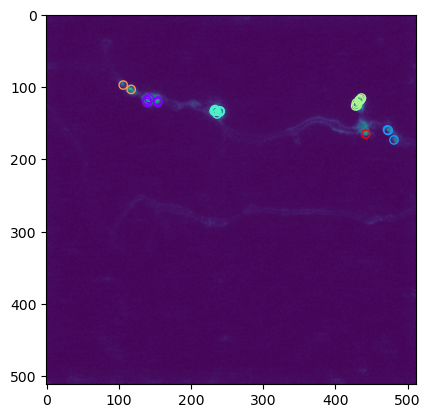

0 [[119 154]
 [116 142]
 [121 139]
 [121 154]
 [118 139]]
1 [[159 472]
 [160 473]
 [173 481]]
2 [[133 235]
 [131 233]
 [134 240]
 [137 236]
 [133 240]
 [133 232]
 [133 240]
 [133 234]]
3 [[122 429]
 [119 433]
 [118 433]
 [126 428]
 [115 436]
 [125 430]
 [117 435]]
4 [[103 117]
 [ 97 106]]
5 [[165 442]]


In [25]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=30).fit(_peaks)
print(clusters.labels_)
colors = cm.rainbow(np.linspace(0, 1, 1+np.max(clusters.labels_)))
c = [colors[i] for i in clusters.labels_]
plt.imshow(grf.API_IMG().imgDiffMaxTime)
plt.scatter(_peaks[:,1], _peaks[:,0], facecolors='none', edgecolors=c)
plt.show()

peakClusters = {}
peakBoundingBoxes = {}
for i in range(np.max(clusters.labels_)+1):
    _ind = [n for n in range(len(clusters.labels_)) if clusters.labels_[n] == i]
    peakClusters[i] = _peaks[_ind]
    print(i, peakClusters[i])

In [70]:
signalCenters = {}
for k,v in peakClusters.items():
    x = np.mean(v[:, 1])
    y = np.mean(v[:, 0])
    signalCenters[k] = (x,y)
print(signalCenters)

{0: (np.float64(145.6), np.float64(119.0)), 1: (np.float64(475.3333333333333), np.float64(164.0)), 2: (np.float64(236.25), np.float64(133.375)), 3: (np.float64(432.0), np.float64(120.28571428571429)), 4: (np.float64(111.5), np.float64(100.0)), 5: (np.float64(442.0), np.float64(165.0))}


In [36]:
signalImages = {}
for k,v in peakClusters.items():
    ymin = np.min(v[:,0])-20
    ymax = np.max(v[:,0])+20
    xmin = np.min(v[:,1])-20
    xmax = np.max(v[:,1])+20
    signalImages[k] = {int(f):[] for f in roiImage.signalFrames}
    for k2 in signalImages[k].keys():
        signalImages[k][k2] = grf.API_IMG().imgDiff[k2, ymin:ymax, xmin:xmax]

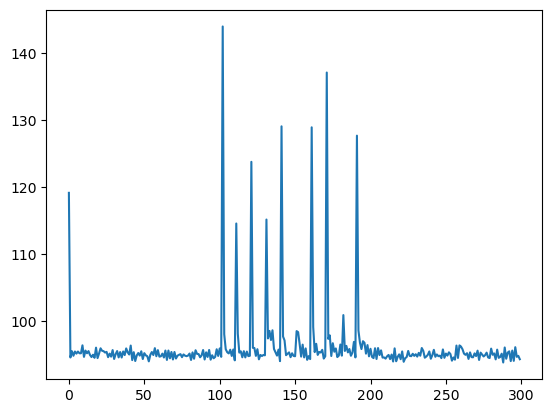

In [81]:
= grf.API_IMG().GetImgConv_At(signalCenters[2], 6)

plt.plot(signal)

In [85]:
def Plot(peak, frameIndex):
    global signalImages, _diffMin
    frame = roiImage.signalFrames[frameIndex]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(signalImages[peak][frame], vmin=0, vmax=_diffMin)
    _imgmask, _n = grf.API_IMG().GetImgConv_At(signalCenters[peak], 6)
    signal = np.sum(_imgmask, axis=(1,2))/_n
    ax2.plot(signal)
    plt.tight_layout()
    plt.show()

interact(Plot, 
         peak=widgets.IntSlider(min=0, max=(len(signalImages)-1), step=1, value=0),
         frameIndex=widgets.IntSlider(min=0, max=(len(roiImage.signalFrames)-1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='peak', max=5), IntSlider(value=0, description='frameInde…

<function __main__.Plot(peak, frameIndex)>